In [1]:
import numpy as ny
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
from sklearn.cross_validation import train_test_split

C:\Users\Srini\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn import metrics

In [6]:
sb.set(color_codes=True)

In [34]:
df=pd.read_csv('Life Expectancy Data.csv')

In [35]:
#Rename all columsn in order
df.columns=['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness_1_19_years', 'thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling']

In [36]:
a=pd.DataFrame(pd.get_dummies(df.Country))
b=pd.DataFrame(pd.get_dummies(df.Status))
df=pd.concat([df,a,b],axis=1,sort=False)

In [37]:
df.drop(['Country','Status'],axis=1,inplace=True)

In [38]:
df.dtypes

Year                                                      int64
Life_expectancy                                         float64
Adult_Mortality                                         float64
infant_deaths                                             int64
Alcohol                                                 float64
percentage_expenditure                                  float64
Hepatitis_B                                             float64
Measles                                                   int64
BMI                                                     float64
under-five_deaths                                         int64
Polio                                                   float64
Total_expenditure                                       float64
Diphtheria                                              float64
HIV/AIDS                                                float64
GDP                                                     float64
Population                              

In [47]:
df

Year  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0     2015             65.0            263.0             62    0.010   
1     2014             59.9            271.0             64    0.010   
2     2013             59.9            268.0             66    0.010   
3     2012             59.5            272.0             69    0.010   
4     2011             59.2            275.0             71    0.010   
5     2010             58.8            279.0             74    0.010   
6     2009             58.6            281.0             77    0.010   
7     2008             58.1            287.0             80    0.030   
8     2007             57.5            295.0             82    0.020   
9     2006             57.3            295.0             84    0.030   
10    2005             57.3            291.0             85    0.020   
11    2004             57.0            293.0             87    0.020   
12    2003             56.7            295.0             87    0.010   
13    2002             56.2              3.0             88    0.010   
14    2001             55.3            316.0             88    0.010   
15    2000             54.8            321.0             88    0.010   
16    2015             77.8             74.0              0    4.600   
17    2014             77.5              8.0              0    4.510   
18    2013             77.2             84.0              0    4.760   
19    2012             76.9             86.0              0    5.140   
20    2011             76.6             88.0              0    5.370   
21    2010             76.2             91.0              1    5.280   
22    2009             76.1             91.0              1    5.790   
23    2008             75.3              1.0              1    5.610   
24    2007             75.9              9.0              1    5.580   
25    2006             74.2             99.0              1    5.310   
26    2005             73.5             15.0              1    5.160   
27    2004             73.0             17.0              1    4.540   
28    2003             72.8             18.0              1    4.290   
29    2002             73.3             15.0              1    3.730   
...    ...              ...              ...            ...      ...   
2908  2013             63.0            328.0             29    2.410   
2909  2012             59.2            349.0             29    2.590   
2910  2011             58.2            366.0             29    2.570   
2911  2010             58.0            363.0             30    2.470   
2912  2009             57.4            368.0             30    2.300   
2913  2008             55.7             45.0             31    2.120   
2914  2007             52.6            487.0             32    2.080   
2915  2006             58.0            526.0             33    2.250   
2916  2005             49.3            554.0             34    2.330   
2917  2004             47.9            578.0             36    2.460   
2918  2003             46.4             64.0             39    2.330   
2919  2002             45.5             69.0             41    2.440   
2920  2001             44.6            611.0             43    2.610   
2921  2000             43.8            614.0             44    2.620   
2922  2015             67.0            336.0             22    3.755   
2923  2014             59.2            371.0             23    6.500   
2924  2013             58.0            399.0             25    6.390   
2925  2012             56.6            429.0             26    6.090   
2926  2011             54.9            464.0             28    6.000   
2927  2010             52.4            527.0             29    5.210   
2928  2009             50.0            587.0             30    4.640   
2929  2008             48.2            632.0             30    3.560   
2930  2007             46.6             67.0             29    3.880   
2931  2006             45.4              7.0  

In [39]:
df.describe()

Year  Life_expectancy  Adult_Mortality  infant_deaths  \
count  2938.000000      2928.000000      2928.000000    2938.000000   
mean   2007.518720        69.224932       164.796448      30.303948   
std       4.613841         9.523867       124.292079     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.100000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.700000       228.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage_expenditure  Hepatitis_B        Measles  \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

               BMI  under-five_deaths     ...           Uruguay   Uzbekistan  \
count  2904.000000        2938.000000     ...       2938.000000  2938.000000   
mean     38.321247          42.035739     ...          0.005446     0.005446   
std      20.044034         160.445548     ...          0.073608     0.073608   
min       1.000000           0.000000     ...          0.000000     0.000000   
25%      19.300000           0.000000     ...          0.000000     0.000000   
50%      43.500000           4.000000     ...          0.000000     0.000000   
75%      56.200000          28.000000     ...          0.000000     0.000000   
max      87.300000        2500.000000     ...          1.000000     1.000000   

           Vanuatu  Venezuela (Bolivarian Republic of)     Viet Nam  \
count  2938.000000                         2938.000000  2938.000000   
mean      0.005446                            0.005446     0.005446   
std       0.073608                            0.073608     0.073608   
min       0.000000                            0.000000     0.000000   
25%       0.000000                            0.000000     0.000000   
50%       0.000000                            0.000000     0.000000   
75%       0.000000                            0.000000     0.000000   
max       1.000000                            1.000000     1.000000   

             Yemen       Zambia     Zimbabwe    Developed   Developing  
count  2938.000000  2938.000000  2938.000000  2938.000000  2938.000000  
mean      0.005446     0.005446     0.005446     0.174268     0.825732  
std       0.073608     0.073608     0.073608     0.379405     0.379405  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     1.000000  
50%       0.000000     0.000000     0.000000     0.000000     1.000000  
75%       0.000000     0.000000     0.000000     0.000000     1.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 215 columns]

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Columns: 215 entries, Year to Developing
dtypes: float64(16), int64(4), uint8(195)
memory usage: 1018.6 KB


In [41]:
df.columns

Index(['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Yemen', 'Zambia',
       'Zimbabwe', 'Developed', 'Developing'],
      dtype='object', length=215)

In [42]:
#fill na using median to avoid outliers
df.Life_expectancy.fillna(df.describe()['Life_expectancy']['50%'],inplace=True)
df.Adult_Mortality.fillna(df.describe()['Adult_Mortality']['50%'],inplace=True)
df.Alcohol.fillna(df.describe()['Alcohol']['50%'],inplace=True)
df.Hepatitis_B.fillna(df.describe()['Hepatitis_B']['50%'],inplace=True)
df.BMI.fillna(df.describe()['BMI']['50%'],inplace=True)
df.Polio.fillna(df.describe()['Polio']['50%'],inplace=True)
df.Total_expenditure.fillna(df.describe()['Total_expenditure']['50%'],inplace=True)
df.Diphtheria.fillna(df.describe()['Diphtheria']['50%'],inplace=True)
df.GDP.fillna(df.describe()['GDP']['50%'],inplace=True)
df.Population.fillna(df.describe()['Population']['50%'],inplace=True)
df.thinness_1_19_years.fillna(df.describe()['thinness_1_19_years']['50%'],inplace=True)
df.thinness_5_9_years.fillna(df.describe()['thinness_5_9_years']['50%'],inplace=True)
df.Income_composition_of_resources.fillna(df.describe()['Income_composition_of_resources']['50%'],inplace=True)
df.Schooling.fillna(df.describe()['Schooling']['50%'],inplace=True)

In [43]:
df.head(1500)

Year  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0     2015             65.0            263.0             62    0.010   
1     2014             59.9            271.0             64    0.010   
2     2013             59.9            268.0             66    0.010   
3     2012             59.5            272.0             69    0.010   
4     2011             59.2            275.0             71    0.010   
5     2010             58.8            279.0             74    0.010   
6     2009             58.6            281.0             77    0.010   
7     2008             58.1            287.0             80    0.030   
8     2007             57.5            295.0             82    0.020   
9     2006             57.3            295.0             84    0.030   
10    2005             57.3            291.0             85    0.020   
11    2004             57.0            293.0             87    0.020   
12    2003             56.7            295.0             87    0.010   
13    2002             56.2              3.0             88    0.010   
14    2001             55.3            316.0             88    0.010   
15    2000             54.8            321.0             88    0.010   
16    2015             77.8             74.0              0    4.600   
17    2014             77.5              8.0              0    4.510   
18    2013             77.2             84.0              0    4.760   
19    2012             76.9             86.0              0    5.140   
20    2011             76.6             88.0              0    5.370   
21    2010             76.2             91.0              1    5.280   
22    2009             76.1             91.0              1    5.790   
23    2008             75.3              1.0              1    5.610   
24    2007             75.9              9.0              1    5.580   
25    2006             74.2             99.0              1    5.310   
26    2005             73.5             15.0              1    5.160   
27    2004             73.0             17.0              1    4.540   
28    2003             72.8             18.0              1    4.290   
29    2002             73.3             15.0              1    3.730   
...    ...              ...              ...            ...      ...   
1470  2003             73.5             15.0              1    2.190   
1471  2002             73.2             17.0              1    1.980   
1472  2001             73.0             11.0              1    2.190   
1473  2000             72.7            112.0              1    2.260   
1474  2015             53.7            484.0              4    3.755   
1475  2014             52.1            522.0              4    0.010   
1476  2013             52.1            518.0              4    0.010   
1477  2012             52.2            513.0              4    0.010   
1478  2011             52.3             52.0              4    2.390   
1479  2010             51.1            527.0              4    2.710   
1480  2009             49.4            566.0              4    2.750   
1481  2008             47.8            592.0              5    2.750   
1482  2007             46.2            633.0              4    2.690   
1483  2006             45.3            654.0              5    2.610   
1484  2005             44.5            675.0              5    2.670   
1485  2004             44.8            666.0              5    1.800   
1486  2003             45.5            648.0              5    1.990   
1487  2002             46.4            622.0              5    2.950   
1488  2001             47.8            586.0              5    2.860   
1489  2000             49.3            543.0              5    3.100   
1490  2015             61.4            259.0              8    3.755   
1491  2014             58.1            329.0              8    0.010   
1492  2013             61.1            258.0              9    0.010   
1493  2012             67.0            261.0  

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Columns: 215 entries, Year to Developing
dtypes: float64(16), int64(4), uint8(195)
memory usage: 1018.6 KB


In [45]:
df.isna().sum().sum()

0

In [46]:
df.isnull().sum().sum()

0

In [23]:
df.duplicated().sum()

0

In [48]:
#correlation of n*n
df.corr()

Year  Life_expectancy  \
Year                                                1.000000         0.170819   
Life_expectancy                                     0.170819         1.000000   
Adult_Mortality                                    -0.079535        -0.696390   
infant_deaths                                      -0.037415        -0.196769   
Alcohol                                            -0.069147         0.388918   
percentage_expenditure                              0.031400         0.381418   
Hepatitis_B                                         0.021302         0.170219   
Measles                                            -0.082493        -0.157767   
BMI                                                 0.108484         0.556901   
under-five_deaths                                  -0.042937        -0.222738   
Polio                                               0.091388         0.458399   
Total_expenditure                                   0.074552         0.208844   
Diphtheria                                          0.131373         0.472211   
HIV/AIDS                                           -0.139741        -0.556703   
GDP                                                 0.091480         0.430461   
Population                                          0.014027        -0.029014   
thinness_1_19_years                                -0.047827        -0.468002   
thinness_5_9_years                                 -0.050859        -0.462473   
Income_composition_of_resources                     0.236594         0.688662   
Schooling                                           0.203517         0.713054   
Afghanistan                                        -0.000300        -0.085933   
Albania                                            -0.000300         0.046088   
Algeria                                            -0.000300         0.034121   
Angola                                             -0.000300        -0.157343   
Antigua and Barbuda                                -0.000300         0.045310   
Argentina                                          -0.000300         0.046088   
Armenia                                            -0.000300         0.032419   
Australia                                          -0.000300         0.097894   
Austria                                            -0.000300         0.095316   
Azerbaijan                                         -0.000300         0.011648   
...                                                      ...              ...   
Sweden                                             -0.000300         0.103391   
Switzerland                                        -0.000300         0.101932   
Syrian Arab Republic                               -0.000300         0.012572   
Tajikistan                                         -0.000300        -0.020069   
Thailand                                           -0.000300         0.029938   
The former Yugoslav republic of Macedonia          -0.000300         0.037964   
Timor-Leste                                        -0.000300        -0.034856   
Togo                                               -0.000300        -0.097851   
Tonga                                              -0.000300         0.025657   
Trinidad and Tobago                                -0.000300         0.014274   
Tunisia                                            -0.000300         0.039862   
Turkey                                             -0.000300         0.036408   
Turkmenistan                                       -0.000300        -0.035927   
Tuvalu                                              0.021925         0.005561   
Uganda                                             -0.000300        -0.105294   
Ukraine                                            -0.000300         0.005470   
United Arab Emirates                               -0.000300         0.050320   
United Kingdom of Great Britain and Northern Ir... -0.000300         0.089965   
United

In [50]:
#indiviual correlartion between the dependent variable
print("Year:",df['Life_expectancy'].corr(df['Year']))
print("Adult_Mortality:",df['Life_expectancy'].corr(df['Adult_Mortality']))
print("infant_deaths:",df['Life_expectancy'].corr(df['infant_deaths']))
print("Alcohol:",df['Life_expectancy'].corr(df['Alcohol']))
print("percentage_expenditure:",df['Life_expectancy'].corr(df['percentage_expenditure']))
print("Hepatitis_B:",df['Life_expectancy'].corr(df['Hepatitis_B']))
print("Measles:",df['Life_expectancy'].corr(df['Measles']))
print("BMI:",df['Life_expectancy'].corr(df['BMI']))
print("under-five_deaths:",df['Life_expectancy'].corr(df['under-five_deaths']))
print("Polio:",df['Life_expectancy'].corr(df['Polio']))
print("Total_expenditure:",df['Life_expectancy'].corr(df['Total_expenditure']))
print("Diphtheria:",df['Life_expectancy'].corr(df['Diphtheria']))
print("HIV/AIDS:",df['Life_expectancy'].corr(df['HIV/AIDS']))
print("GDP:",df['Life_expectancy'].corr(df['GDP']))
print("Population:",df['Life_expectancy'].corr(df['Population']))
print("thinness_1_19_years:",df['Life_expectancy'].corr(df['thinness_1_19_years']))
print("thinness_5_9_years:",df['Life_expectancy'].corr(df['thinness_5_9_years']))
print("Income_composition_of_resources:",df['Life_expectancy'].corr(df['Income_composition_of_resources']))
print("Schooling:",df['Life_expectancy'].corr(df['Schooling']))

Year: 0.17081927266228716
Adult_Mortality: -0.6963900661578621
infant_deaths: -0.19676905920776064
Alcohol: 0.3889175377541889
percentage_expenditure: 0.3814181024357952
Hepatitis_B: 0.17021863822819575
Measles: -0.15776659076208172
BMI: 0.5569011684850389
under-five_deaths: -0.22273821865854312
Polio: 0.4583993431881284
Total_expenditure: 0.2088436663747834
Diphtheria: 0.47221082241379575
HIV/AIDS: -0.5567034182121152
GDP: 0.4304613014215292
Population: -0.029013876863187942
thinness_1_19_years: -0.46800224183739225
thinness_5_9_years: -0.4624731727792242
Income_composition_of_resources: 0.6886616217274305
Schooling: 0.7130535310931972


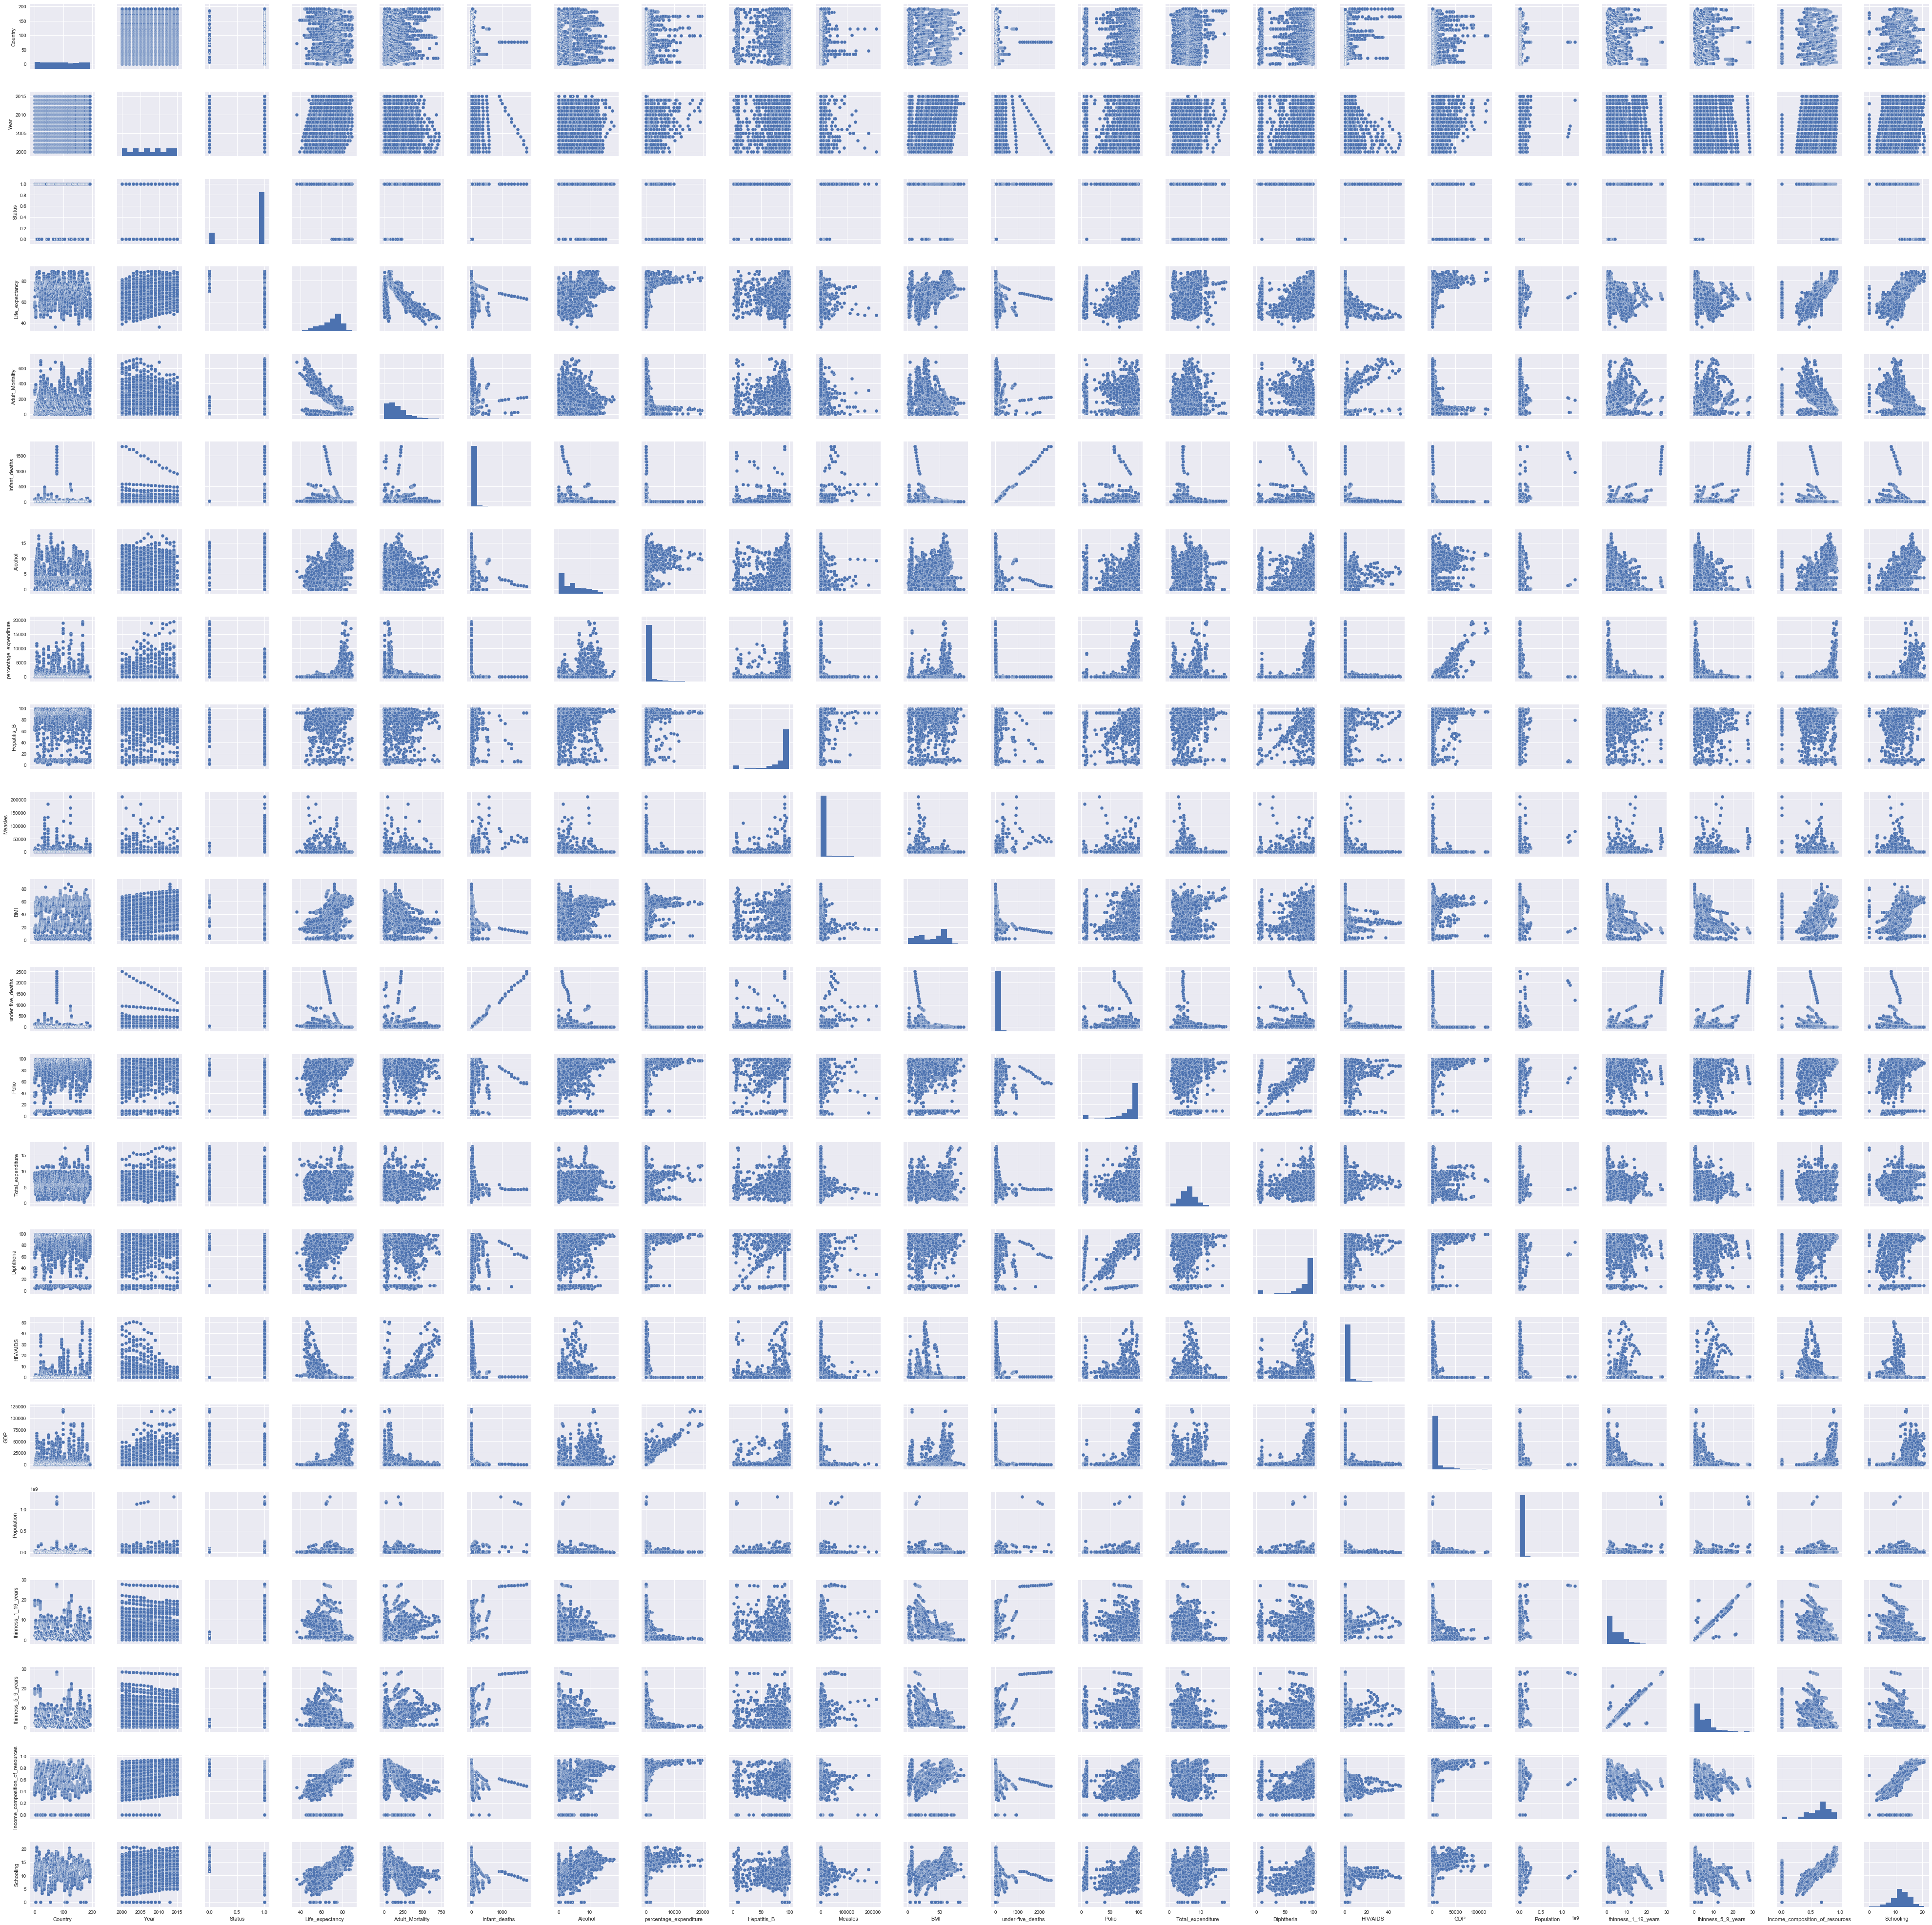

In [25]:
sb.pairplot(df)

C:\Users\Srini\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


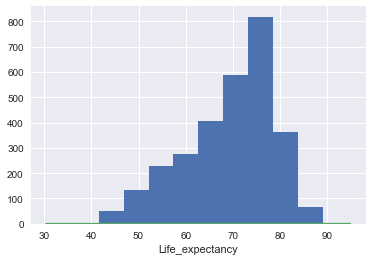

In [26]:
plt.hist(df.Life_expectancy)
sb.distplot(df.Life_expectancy,bins=10)

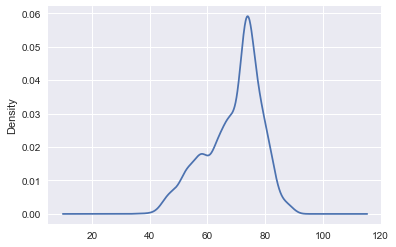

In [23]:
df.Life_expectancy.plot.density()

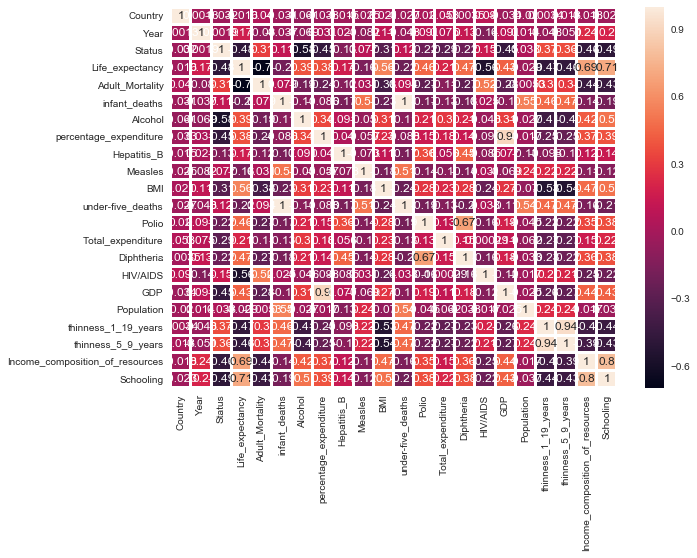

In [24]:
plt.figure(figsize=(10,7))
sb.heatmap(df.corr(),annot=True,linewidths=2)

In [51]:
#Alcohol: 0.3889175377541889
#percentage_expenditure: 0.3814181024357952
#BMI: 0.5569011684850389
#Polio: 0.4583993431881284
#Diphtheria: 0.47221082241379575
#GDP: 0.4304613014215292
#Income_composition_of_resources: 0.6886616217274305
#Schooling: 0.7130535310931972
#Status: -0.4814147351784171
#Adult_Mortality: -0.6963900661578621
#HIV/AIDS: -0.5567034182121152
#thinness_1_19_years: -0.46800224183739225
#thinness_5_9_years: -0.4624731727792242

#Create a new data set which correlation with Life_expectancy(Dependent variable)
df_copy=df.copy()

In [52]:
df_copy

Year  Life_expectancy  Adult_Mortality  infant_deaths  Alcohol  \
0     2015             65.0            263.0             62    0.010   
1     2014             59.9            271.0             64    0.010   
2     2013             59.9            268.0             66    0.010   
3     2012             59.5            272.0             69    0.010   
4     2011             59.2            275.0             71    0.010   
5     2010             58.8            279.0             74    0.010   
6     2009             58.6            281.0             77    0.010   
7     2008             58.1            287.0             80    0.030   
8     2007             57.5            295.0             82    0.020   
9     2006             57.3            295.0             84    0.030   
10    2005             57.3            291.0             85    0.020   
11    2004             57.0            293.0             87    0.020   
12    2003             56.7            295.0             87    0.010   
13    2002             56.2              3.0             88    0.010   
14    2001             55.3            316.0             88    0.010   
15    2000             54.8            321.0             88    0.010   
16    2015             77.8             74.0              0    4.600   
17    2014             77.5              8.0              0    4.510   
18    2013             77.2             84.0              0    4.760   
19    2012             76.9             86.0              0    5.140   
20    2011             76.6             88.0              0    5.370   
21    2010             76.2             91.0              1    5.280   
22    2009             76.1             91.0              1    5.790   
23    2008             75.3              1.0              1    5.610   
24    2007             75.9              9.0              1    5.580   
25    2006             74.2             99.0              1    5.310   
26    2005             73.5             15.0              1    5.160   
27    2004             73.0             17.0              1    4.540   
28    2003             72.8             18.0              1    4.290   
29    2002             73.3             15.0              1    3.730   
...    ...              ...              ...            ...      ...   
2908  2013             63.0            328.0             29    2.410   
2909  2012             59.2            349.0             29    2.590   
2910  2011             58.2            366.0             29    2.570   
2911  2010             58.0            363.0             30    2.470   
2912  2009             57.4            368.0             30    2.300   
2913  2008             55.7             45.0             31    2.120   
2914  2007             52.6            487.0             32    2.080   
2915  2006             58.0            526.0             33    2.250   
2916  2005             49.3            554.0             34    2.330   
2917  2004             47.9            578.0             36    2.460   
2918  2003             46.4             64.0             39    2.330   
2919  2002             45.5             69.0             41    2.440   
2920  2001             44.6            611.0             43    2.610   
2921  2000             43.8            614.0             44    2.620   
2922  2015             67.0            336.0             22    3.755   
2923  2014             59.2            371.0             23    6.500   
2924  2013             58.0            399.0             25    6.390   
2925  2012             56.6            429.0             26    6.090   
2926  2011             54.9            464.0             28    6.000   
2927  2010             52.4            527.0             29    5.210   
2928  2009             50.0            587.0             30    4.640   
2929  2008             48.2            632.0             30    3.560   
2930  2007             46.6             67.0             29    3.880   
2931  2006             45.4              7.0  

In [53]:
df_copy.corr()

Year  Life_expectancy  \
Year                                                1.000000         0.170819   
Life_expectancy                                     0.170819         1.000000   
Adult_Mortality                                    -0.079535        -0.696390   
infant_deaths                                      -0.037415        -0.196769   
Alcohol                                            -0.069147         0.388918   
percentage_expenditure                              0.031400         0.381418   
Hepatitis_B                                         0.021302         0.170219   
Measles                                            -0.082493        -0.157767   
BMI                                                 0.108484         0.556901   
under-five_deaths                                  -0.042937        -0.222738   
Polio                                               0.091388         0.458399   
Total_expenditure                                   0.074552         0.208844   
Diphtheria                                          0.131373         0.472211   
HIV/AIDS                                           -0.139741        -0.556703   
GDP                                                 0.091480         0.430461   
Population                                          0.014027        -0.029014   
thinness_1_19_years                                -0.047827        -0.468002   
thinness_5_9_years                                 -0.050859        -0.462473   
Income_composition_of_resources                     0.236594         0.688662   
Schooling                                           0.203517         0.713054   
Afghanistan                                        -0.000300        -0.085933   
Albania                                            -0.000300         0.046088   
Algeria                                            -0.000300         0.034121   
Angola                                             -0.000300        -0.157343   
Antigua and Barbuda                                -0.000300         0.045310   
Argentina                                          -0.000300         0.046088   
Armenia                                            -0.000300         0.032419   
Australia                                          -0.000300         0.097894   
Austria                                            -0.000300         0.095316   
Azerbaijan                                         -0.000300         0.011648   
...                                                      ...              ...   
Sweden                                             -0.000300         0.103391   
Switzerland                                        -0.000300         0.101932   
Syrian Arab Republic                               -0.000300         0.012572   
Tajikistan                                         -0.000300        -0.020069   
Thailand                                           -0.000300         0.029938   
The former Yugoslav republic of Macedonia          -0.000300         0.037964   
Timor-Leste                                        -0.000300        -0.034856   
Togo                                               -0.000300        -0.097851   
Tonga                                              -0.000300         0.025657   
Trinidad and Tobago                                -0.000300         0.014274   
Tunisia                                            -0.000300         0.039862   
Turkey                                             -0.000300         0.036408   
Turkmenistan                                       -0.000300        -0.035927   
Tuvalu                                              0.021925         0.005561   
Uganda                                             -0.000300        -0.105294   
Ukraine                                            -0.000300         0.005470   
United Arab Emirates                               -0.000300         0.050320   
United Kingdom of Great Britain and Northern Ir... -0.000300         0.089965   
United

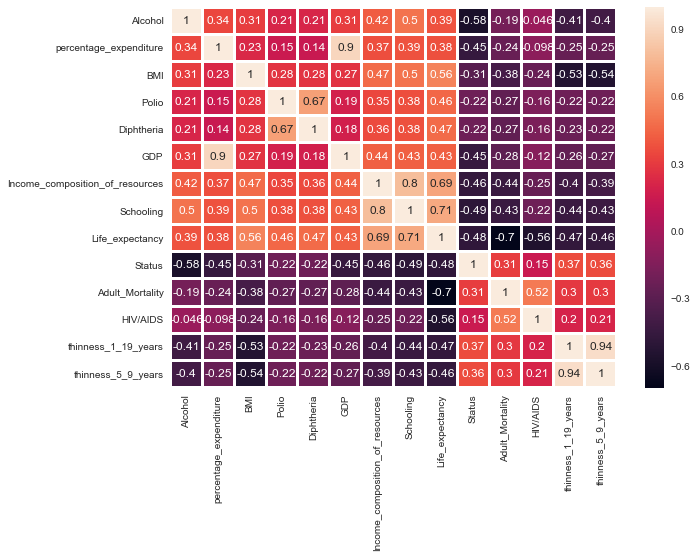

In [94]:
plt.figure(figsize=(10,7))
sb.heatmap(df_copy.corr(),annot=True,linewidths=2)

In [95]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 14 columns):
Alcohol                            2938 non-null float64
percentage_expenditure             2938 non-null float64
BMI                                2938 non-null float64
Polio                              2938 non-null float64
Diphtheria                         2938 non-null float64
GDP                                2938 non-null float64
Income_composition_of_resources    2938 non-null float64
Schooling                          2938 non-null float64
Life_expectancy                    2938 non-null float64
Status                             2938 non-null int8
Adult_Mortality                    2938 non-null float64
HIV/AIDS                           2938 non-null float64
thinness_1_19_years                2938 non-null float64
thinness_5_9_years                 2938 non-null float64
dtypes: float64(13), int8(1)
memory usage: 301.3 KB


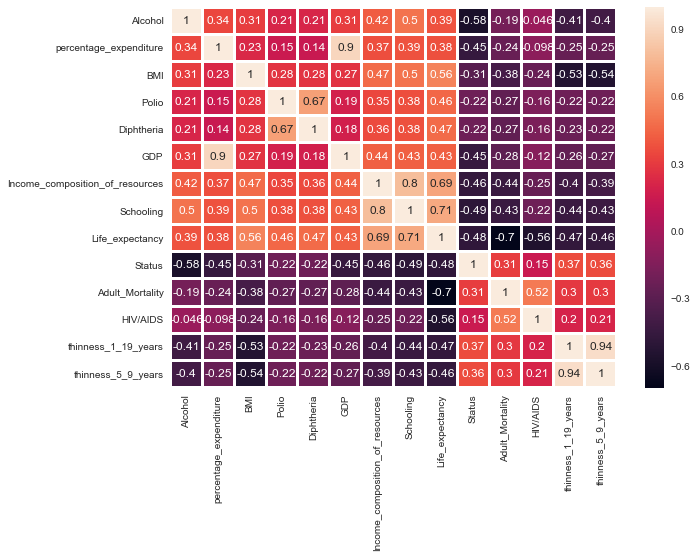

In [96]:
plt.figure(figsize=(10,7))
sb.heatmap(df_copy.corr(),annot=True,linewidths=2)

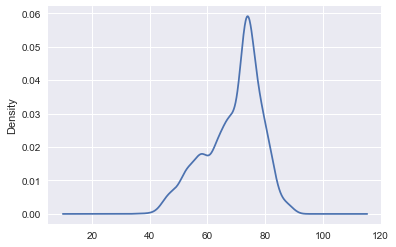

In [97]:
df_copy.Life_expectancy.plot.density()

In [54]:
#Split dependent and independent data
X=df_copy.drop(['Life_expectancy'],axis=1)
Y=df_copy['Life_expectancy']

In [55]:
print(X.shape)
print(Y.shape)

(2938, 214)
(2938,)


In [56]:
#split train and test data
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=111)

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2056, 214)
(882, 214)
(2056,)
(882,)


In [58]:
lm=LinearRegression()

In [59]:
lm=lm.fit(x_train,y_train)

In [60]:
lm.intercept_

-467.33674622066974

In [61]:
lm.coef_

array([ 2.69044693e-01, -2.83020583e-03,  6.77665297e-02, -5.57347152e-02,
        8.53737179e-05, -5.40208557e-03, -5.27800229e-06, -2.07506599e-03,
       -5.04034228e-02,  4.53665846e-03, -3.02534924e-02,  7.22378218e-03,
       -3.03825300e-01, -1.59811597e-05, -4.59909777e-10,  1.09100063e-02,
        2.77169037e-02, -5.59999818e-01,  1.12990999e-01, -9.68971494e+00,
        6.89032748e+00,  4.96693058e+00, -1.58286939e+01,  7.50505204e+00,
        6.83066536e+00,  5.48648693e+00,  2.46549812e+00,  2.97821917e+00,
        2.76591352e+00,  6.57392876e+00,  7.01765665e+00,  4.44425108e-01,
        6.04691401e+00,  2.41311350e+00,  1.41953062e+00,  1.21600596e+00,
       -9.47339618e+00, -2.25213152e+00, -4.94934878e-01,  7.76560471e+00,
       -6.62137687e+00,  4.81409578e+00,  7.70384734e+00, -5.85800985e+00,
       -1.02797415e+01, -1.04219283e+01,  4.09419959e+00, -3.74363480e+00,
       -1.09225602e+01,  1.31016631e+01, -1.54371045e+01, -1.44597279e+01,
        1.14817685e+01,  

In [62]:
cof = pd.DataFrame(data=lm.coef_, index=x_train.columns, columns=["Coefficients"])
cof

Coefficients
Year                                                2.690447e-01
Adult_Mortality                                    -2.830206e-03
infant_deaths                                       6.776653e-02
Alcohol                                            -5.573472e-02
percentage_expenditure                              8.537372e-05
Hepatitis_B                                        -5.402086e-03
Measles                                            -5.278002e-06
BMI                                                -2.075066e-03
under-five_deaths                                  -5.040342e-02
Polio                                               4.536658e-03
Total_expenditure                                  -3.025349e-02
Diphtheria                                          7.223782e-03
HIV/AIDS                                           -3.038253e-01
GDP                                                -1.598116e-05
Population                                         -4.599098e-10
thinness_1_19_years                                 1.091001e-02
thinness_5_9_years                                  2.771690e-02
Income_composition_of_resources                    -5.599998e-01
Schooling                                           1.129910e-01
Afghanistan                                        -9.689715e+00
Albania                                             6.890327e+00
Algeria                                             4.966931e+00
Angola                                             -1.582869e+01
Antigua and Barbuda                                 7.505052e+00
Argentina                                           6.830665e+00
Armenia                                             5.486487e+00
Australia                                           2.465498e+00
Austria                                             2.978219e+00
Azerbaijan                                          2.765914e+00
Bahamas                                             6.573929e+00
...                                                          ...
Sweden                                              3.455734e+00
Switzerland                                         3.446732e+00
Syrian Arab Republic                                2.651618e+00
Tajikistan                                         -1.356618e+00
Thailand                                            4.880583e+00
The former Yugoslav republic of Macedonia           5.685934e+00
Timor-Leste                                        -3.732364e+00
Togo                                               -9.905277e+00
Tonga                                               4.346230e+00
Trinidad and Tobago                                 3.830773e+00
Tunisia                                             5.428401e+00
Turkey                                              5.633610e+00
Turkmenistan                                       -3.304033e+00
Tuvalu                                             -1.344068e-07
Uganda                                             -9.675902e+00
Ukraine                                             2.420833e+00
United Arab Emirates                                7.208172e+00
United Kingdom of Great Britain and Northern Ir...  2.091183e+00
United Republic of Tanzania                        -8.616835e+00
United States of America                           -8.076492e-01
Uruguay                                             7.829944e+00
Uzbekistan                                         -1.676767e-01
Vanuatu                                             3.652524e+00
Venezuela (Bolivarian Republic of)                  5.574929e+00
Viet Nam                                            5.981763e+00
Yemen                                              -4.049900e+00
Zambia                                             -9.819422e+00
Zimbabwe                                           -9.011507e+00
Developed                                           5.471613e+00
Developing                                         -5.471633e+00

[214 rows x 1 columns

In [63]:
train_perd = lm.predict(x_train)
test_perd = lm.predict(x_test)

In [64]:
print("Train MSE:",metrics.mean_squared_error(y_train,train_perd))
print("Test MSE:",metrics.mean_squared_error(y_test,test_perd))
print("Train SMSE:",ny.sqrt(metrics.mean_squared_error(y_train,train_perd)))
print("Test SMSE:",ny.sqrt(metrics.mean_squared_error(y_test,test_perd)))
print("Train AME:",metrics.mean_absolute_error(y_train,train_perd))
print("Test AME:",metrics.mean_absolute_error(y_test,test_perd))
print("Train MAPE:",ny.mean(ny.abs((y_train-train_perd)/y_train))*100)
print("Test MAPE:",ny.mean(ny.abs((y_test-test_perd)/y_test))*100)
print("R-squared value of this Train:",round(metrics.r2_score(y_train,train_perd),3))
print("R-squared value of this Test:",round(metrics.r2_score(y_test,test_perd),3))

Train MSE: 3.0815262506716783
Test MSE: 4.09656768050439
Train SMSE: 1.7554276546390848
Test SMSE: 2.0239979447875904
Train AME: 1.0932652438529957
Test AME: 1.2787545076225746
Train MAPE: 1.6290549588823107
Test MAPE: 1.904126024528624
R-squared value of this Train: 0.966
R-squared value of this Test: 0.954


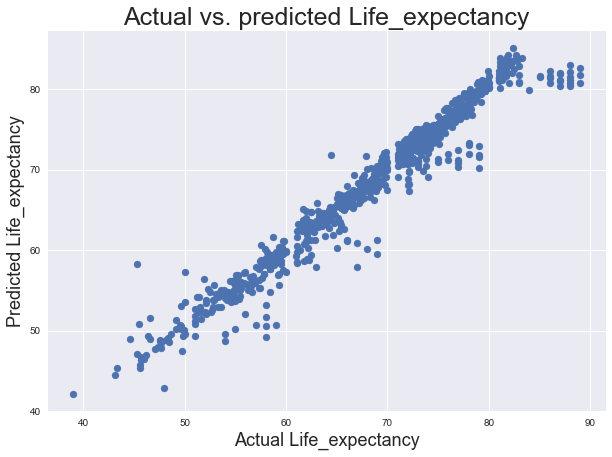

In [65]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted Life_expectancy",fontsize=25)
plt.xlabel("Actual Life_expectancy",fontsize=18)
plt.ylabel("Predicted Life_expectancy", fontsize=18)
plt.scatter(x=y_test,y=test_perd)

C:\Users\Srini\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


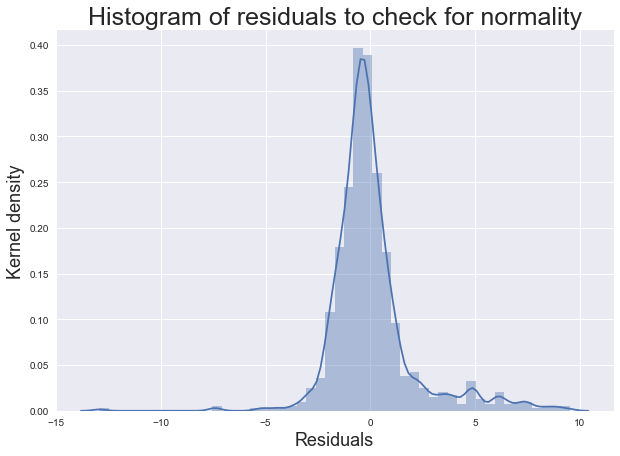

In [66]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sb.distplot([y_test-test_perd])

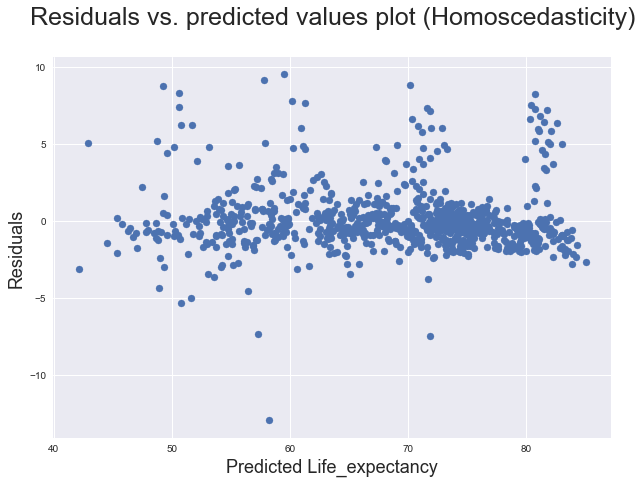

In [67]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n",fontsize=25)
plt.xlabel("Predicted Life_expectancy",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=test_perd,y=y_test-test_perd)

In [112]:
df_result=pd.DataFrame({'Actual_Data':list(y_test),'Predicted_Data':list(test_perd)})

In [113]:
df_result['error_Pct'] = ((df_result.Actual_Data-df_result.Predicted_Data)/df_result.Actual_Data)*100